# CANCER DATA SCIENCE 101

## Formulating the Question

Martin Skarzynski

2019-04-23

### What is data science?
![What is data science?](images/ds_venn.jpg)

### Data science terms
- Workflow
- Tidy (Wrangle, Munge)
- Exploratory Data Analysis
- Feature Engineering
- Machine Learning
- Deep Learning
- Supervised learning (Classification, Regression)
- Unsupervised learning (Clustering, Dimensionality Reduction)
- Underfitting (Bias)
- Overfitting (Variance)

<img src="images/r4ds.png" alt="R for data science" style="width:32%"> <img src="images/moderndive.png" alt="Modern dive" style="width:32%">

## How is data science done?
![How is data science done?](images/ds_workflow.png)

- Visualize ~ Exploratory Data Analysis
- Transform ~ Feature Engineering
- Model ~ Machine Learning

## Exploratory Data Analysis
<img src='images/scatter_matrix.png' width='800px'></img>

## What is AI?
![](images/ai_vs_ml_vs_dl.png)

![](images/classification_vs_regression_weather.png)

![Supervised versus unsupervised](images/classification_vs_regression_vs_clustering.png)

## Logistic regression
![logistic regression](images/logistic_regression.png)

![breast cancer article](images/1994_cancer_letters.png)

![](images/pdsh.png)

![under and overfitting](images/bias_variance.png)

![validation curve](images/validation_curve.png)

### Decision tree
![decision tree](images/tree.png)

### Decision tree levels
![decision tree levels](images/decision_tree_levels.png)

### Decision tree overfitting
![decision tree overfitting](images/decision_tree_overfitting.png)

### Decision tree evaluation
![decision tree evaluation](images/confusion_matrix.png)

### Load packages

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
%matplotlib inline

### Load data

In [2]:
bc = load_breast_cancer()

### Create dataframe

In [3]:
df = pd.DataFrame(bc.data, columns=bc.feature_names)
df['target'] = bc.target
df['Label'] = df.target.replace(0, 'malignant').replace(1, 'benign')

### Exploratory data analysis

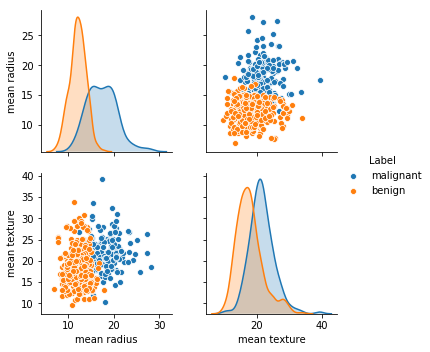

In [4]:
sns.pairplot(df, vars=bc.feature_names[:2], hue='Label')
plt.savefig('images/scatter_matrix.png', dpi=300)

In [5]:
from numpy import bincount
bincount(bc.target)

array([212, 357])

In [6]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
# split data randomly into 70% training and 30% test
X = bc.data
y = bc.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [10]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

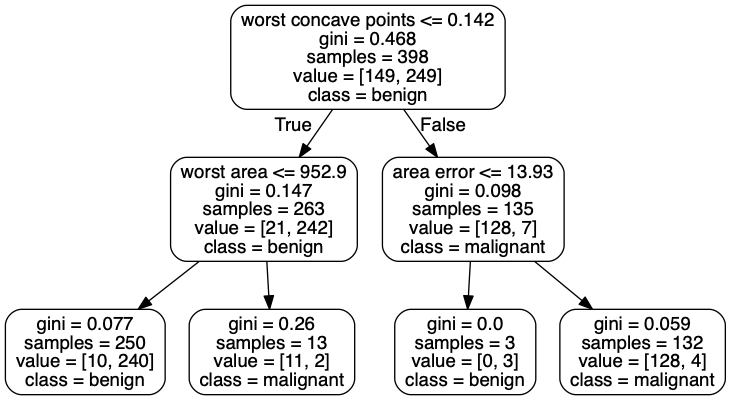

True

In [11]:
dot_data = tree.export_graphviz(dtree, out_file=None, filled=False, rounded=True,
                                feature_names=bc.feature_names,  
                                class_names=bc.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

graph.write_png('images/tree.png')

In [13]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 9
Accuracy: 0.95


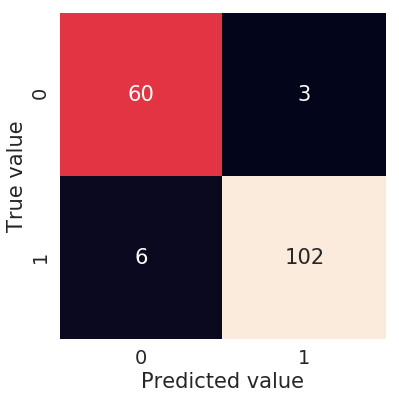

In [26]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='g')
sns.set(font_scale=1.75)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.savefig('images/confusion_matrix.png', dpi=600)

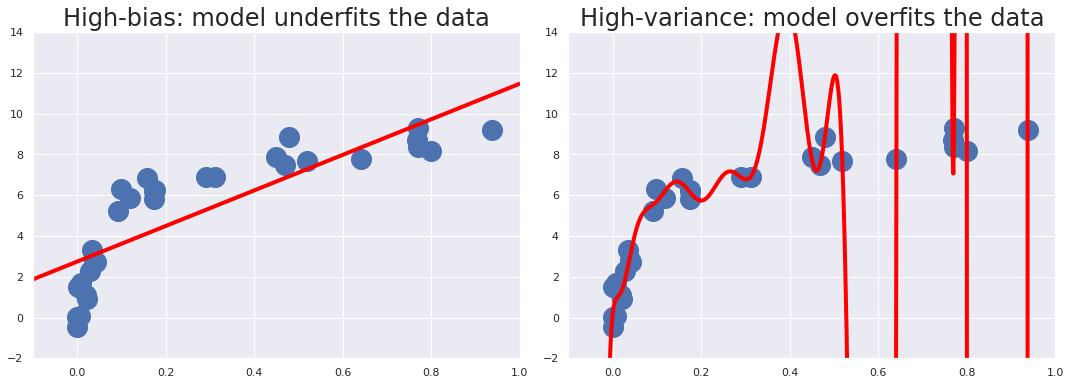

In [14]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=400)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='red', linewidth=4)
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias: model underfits the data', size=24)

ax[1].scatter(X.ravel(), y, s=400)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='red', linewidth=4)
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance: model overfits the data', size=24)

fig.savefig('images/bias_variance.png', dpi = 600)

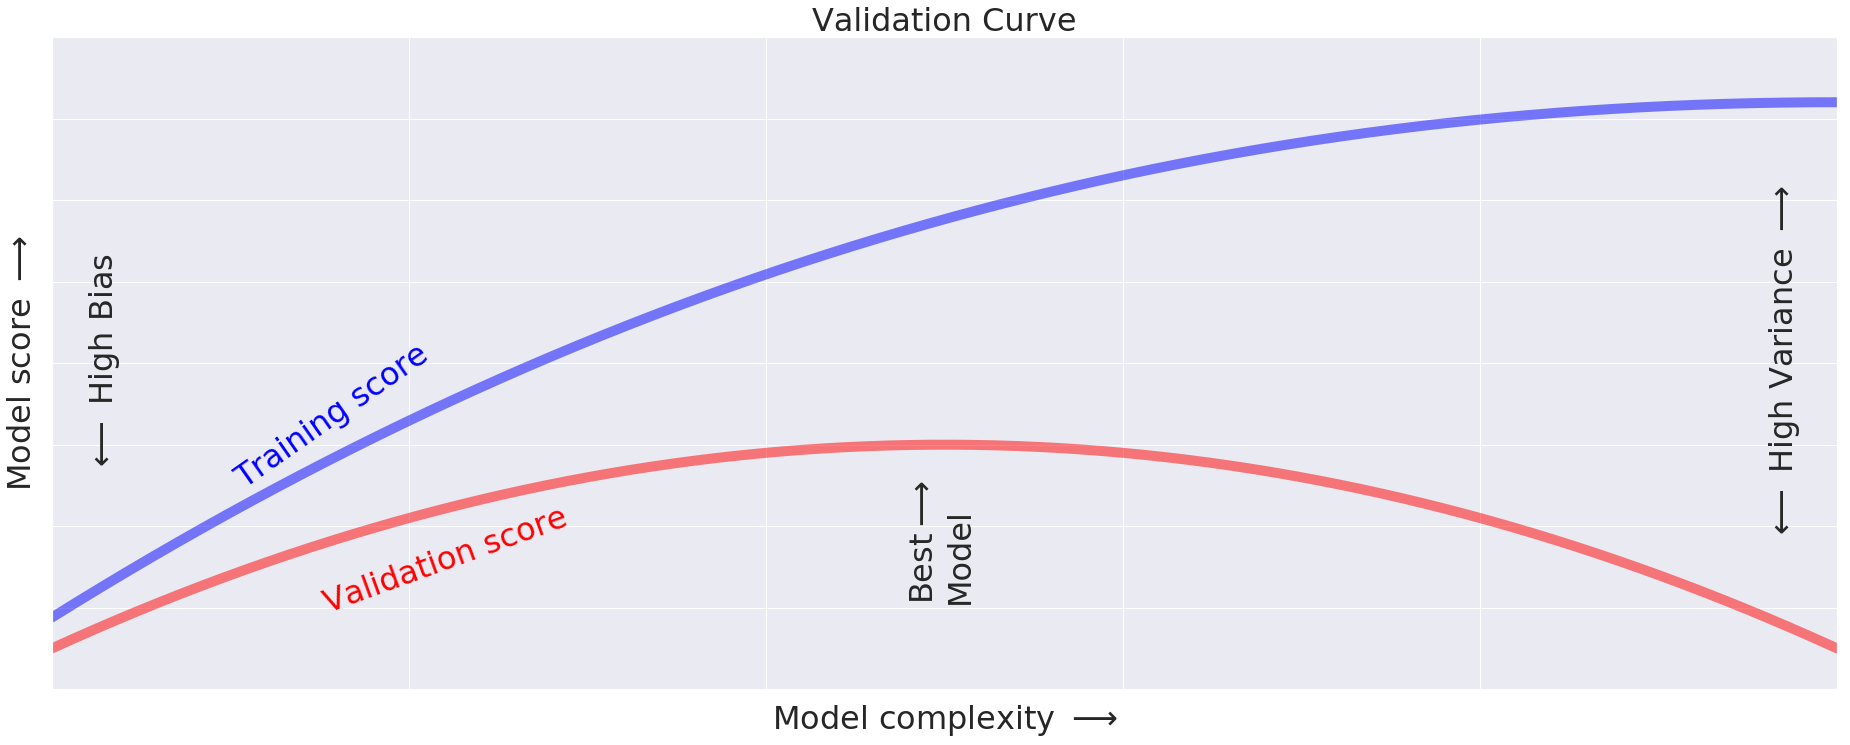

In [15]:
x = np.linspace(0, 1, 1000)
y1 = -(x - 0.5) ** 2
y2 = y1 - 0.33 + np.exp(x - 1)

fig, ax = plt.subplots(figsize = (32, 12))
ax.plot(x, y2, lw=10, alpha=0.5, color='blue')
ax.plot(x, y1, lw=10, alpha=0.5, color='red')

ax.text(0.1, 0.1, "Training score", rotation=35, size=32, color='blue')
ax.text(0.15, -0.1, "Validation score", rotation=20, size=32, color='red')

ax.text(0.02, 0.1, r'$\longleftarrow$ High Bias', size=32, rotation=90, va='center')
ax.text(0.98, 0.1, r'$\longleftarrow$ High Variance $\longrightarrow$', size=32, rotation=90, ha='right', va='center')
ax.text(0.48, -0.12, 'Best$\\longrightarrow$\nModel', size=32, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(-0.3, 0.5)

ax.set_xlabel(r'Model complexity $\longrightarrow$', size=32)
ax.set_ylabel(r'Model score $\longrightarrow$', size=32)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Validation Curve", size=32)

fig.savefig('images/validation_curve.png', dpi=600)

/Users/skarzynskimw/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
/Users/skarzynskimw/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
/Users/skarzynskimw/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


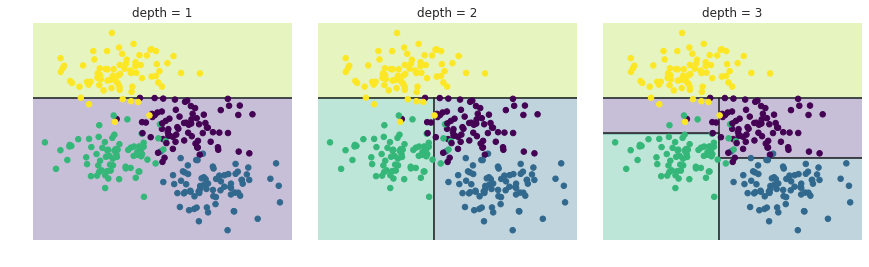

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)


        
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 4)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

fig.savefig('images/decision_tree_levels.png', dpi = 600)

/Users/skarzynskimw/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
/Users/skarzynskimw/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


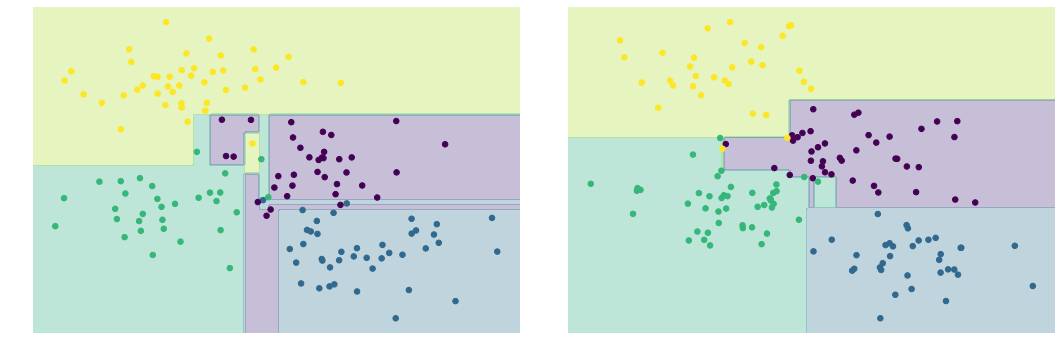

In [17]:
model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0])
visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1])

fig.savefig('images/decision_tree_overfitting.png', dpi=600)